# Final Project Part 2

## Team Members
#### - Tyler Frazer
#### - Nicholas Antoine
#### - Marchos Fernandez

# Contributions
#### Tyler Frazer - Inital code setup in colab. EDA of Intuit dataset, Decomposition and decomposition visuals, autocorolation plot. Added Timeline as well as 30 day moving average plot. Also did the Linear regression model, made predictions, plotted results and calculated accuracy metrics.
#### Marcos Fernandez - Code clean up and refactoring of functiond. Added the description of the time series based on the ADA. Introduced the baseline forecasting models (Mean, Naive & Drift) and ARIMA model along with their predictions and the forecast plots.
#### Nick Antoine - Added an MLP model for time series regression. Compared the performance of the MLP to the previous models using the plotted predictions and the accuracy metrics. 

# Set up and Import the data

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import datetime


from random import gauss
from random import seed
import random
import numpy as np
from pandas import Series
from pandas import read_csv
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm


from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings('ignore')

/Users/nickantoine/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
#!pip install --upgrade pandas statsmodels

In [3]:
# Get Historical Intuit Data since 2015

intuit_data = yf.download("INTU", start="2015-01-01")

# Add daily returnsolumn
intuit_data['Daily_Return'] = intuit_data['Close'].pct_change()

intuit_close = intuit_data["Close"]

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
# Display the first few rows of data
display(intuit_data.head())

print()

# Display the first few rows of data
display(intuit_close.head())


Price,Close,High,Low,Open,Volume,Daily_Return
Ticker,INTU,INTU,INTU,INTU,INTU,
Date,,,,,,
2015-01-02,83.803764,85.595429,83.031976,84.722565,1880300,NaN
2015-01-05,83.473007,83.923217,82.453138,82.967671,2493300,-0.003947
2015-01-06,80.909561,83.794594,80.496104,83.436262,2283800,-0.030710
2015-01-07,81.701981,82.042907,80.964852,81.056992,1657600,0.009794
2015-01-08,82.798454,83.507942,82.116608,82.171891,1947100,0.013420


Ticker,INTU
Date,
2015-01-02,83.803764
2015-01-05,83.473007
2015-01-06,80.909561
2015-01-07,81.701981
2015-01-08,82.798454


In [5]:
#Summary Stats for the Daily Close Price
display(intuit_close.describe())

Ticker,INTU
count,2580.000000
mean,313.583622
std,187.428870
min,73.961510
25%,130.810127
50%,268.249130
75%,459.496613
max,705.076782


#  Time series decomposition

In [6]:
# Decomposition
additive_decomposition = sm.tsa.seasonal_decompose(intuit_close, model='additive', period=252)
multiplicative_decomposition = sm.tsa.seasonal_decompose(intuit_close, model='multiplicative', period=252)

# Time Series Visualization

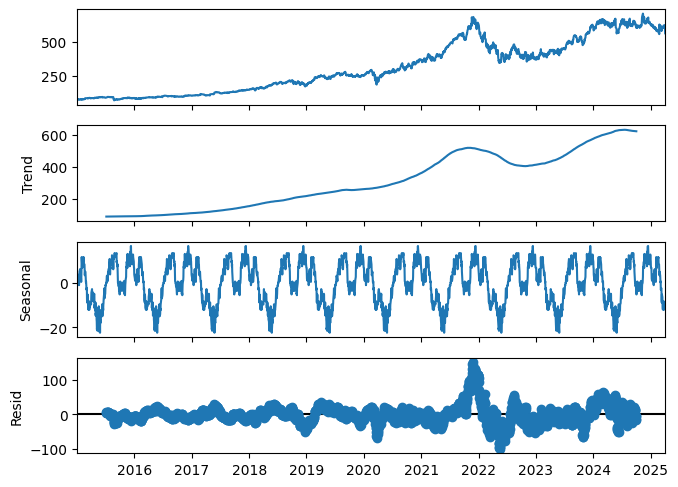

In [7]:
# Plot the additive decomposition
fig = additive_decomposition.plot()
fig.set_size_inches(7, 5)  # Adjust these numbers as needed (width, height)
plt.show()

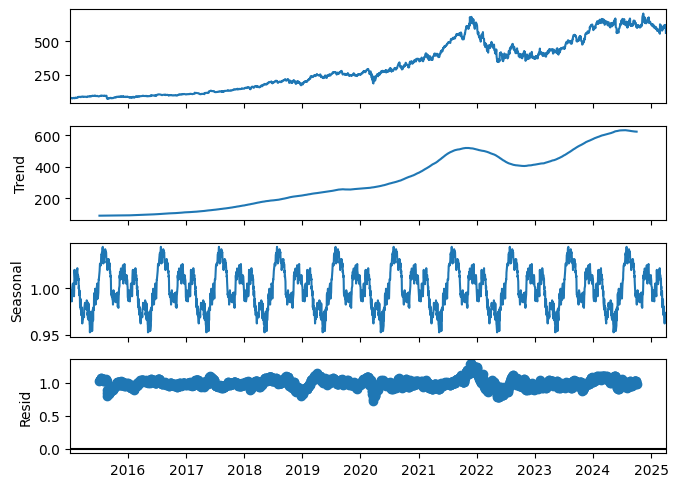

In [8]:
# Plot the multiplicative decomposition
fig = multiplicative_decomposition.plot()
fig.set_size_inches(7, 5)  # Adjust these numbers as needed (width, height)
plt.show()

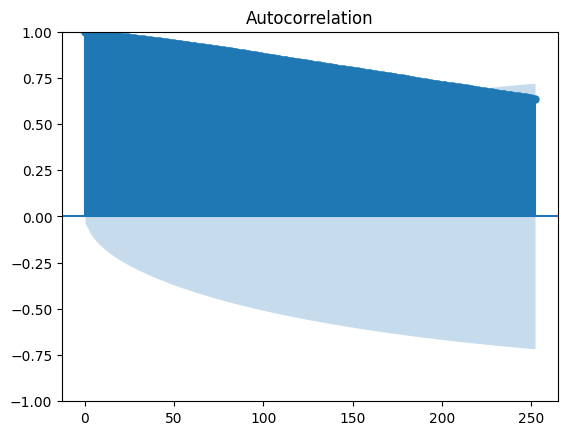

In [9]:
# Autocorrelation
plot_acf(intuit_close, lags=252)
plt.show()

Highly correclated at lag 1 and then decays over time


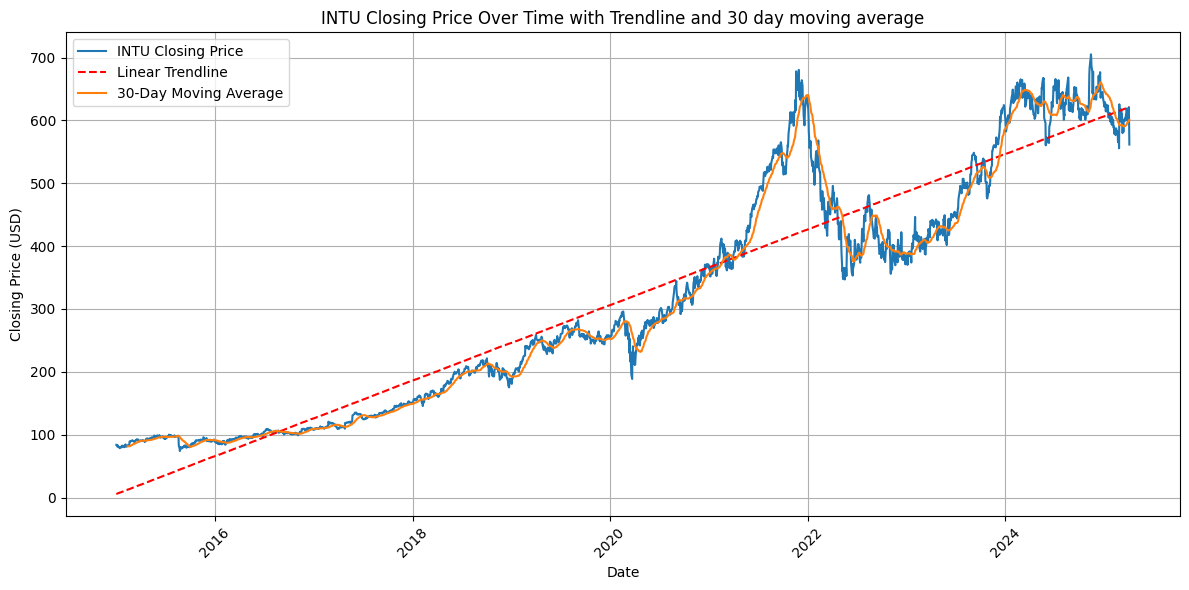

In [10]:
# Line Chart
plt.figure(figsize=(12, 6))
plt.plot(intuit_data.index, intuit_data['Close'], label='INTU Closing Price')

# Linear Trend
x = np.arange(len(intuit_data.index))
z = np.polyfit(x, intuit_data['Close'], 1)
p = np.poly1d(z.flatten())
plt.plot(intuit_data.index, p(x), "r--", label='Linear Trendline')

# Calculate 30-day moving average
intuit_data['30_day_avg'] = intuit_data['Close'].rolling(window=30).mean()['INTU']
plt.plot(intuit_data.index, intuit_data['30_day_avg'], label='30-Day Moving Average')


plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.title('INTU Closing Price Over Time with Trendline and 30 day moving average')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


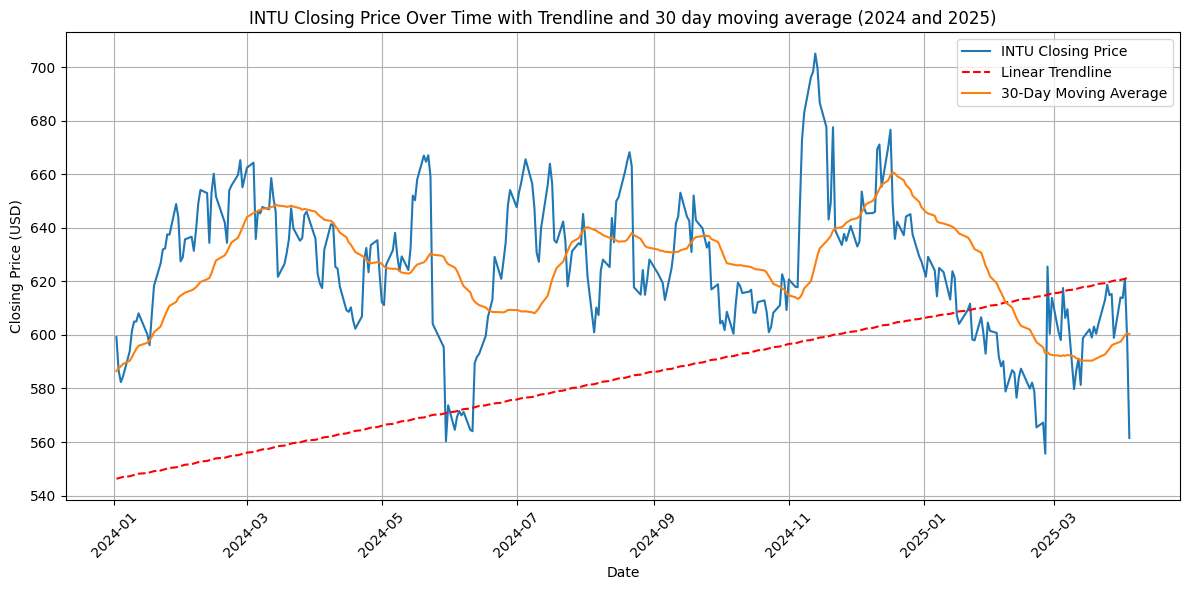

In [11]:
# Line Chart
# Same data as before but starting 2024 so we can see the last year
intuit_data_2024 = intuit_data[intuit_data.index > '2024-01-01']

plt.figure(figsize=(12, 6))
plt.plot(intuit_data_2024.index, intuit_data_2024['Close'], label='INTU Closing Price')

# Linear Trend
y_plot = p(x)[intuit_data.index > '2024-01-01']
plt.plot(intuit_data_2024.index, y_plot, "r--", label='Linear Trendline')

# Calculate 30-day moving average
plt.plot(intuit_data_2024.index, intuit_data_2024['30_day_avg'], label='30-Day Moving Average')


plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.title('INTU Closing Price Over Time with Trendline and 30 day moving average (2024 and 2025)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Description of Time series

As seen before the time series seems to have an overall upward trend, though this trend has become unstable starting around 2012. There is seasonality in the data, though it only accounts for a small portion of the data. The data is non-stationary since the mean as well as the variance seem to change over time. We see in the zoomed in plot that the data is quite chaotic in the day-to-day changes but we predict we'll be able to get forecasts that will be accurate within ~100 to 200 USDs for the price. We are aware that these forecast might be affected by unexpected events like the one that we can see caused a sharp spike around 2022.

# TS models

In [12]:
# Let's set aside the data starting July 2024 to compare with our forecasts.
data_train = intuit_close[intuit_close.index < '2024-06-01'].rename(columns={'INTU': 'Close'})
data_test = intuit_close[intuit_close.index >= '2024-06-01'].rename(columns={'INTU': 'Close'})

future_days = data_test.index.to_series()

print(data_train.shape, data_test.shape)

(2369, 1) (211, 1)


In [90]:
# Helper function for plotting forecasts
def plot_prediction(train, prediction, test, forecast_type = ''):
    plt.figure(figsize=(12, 6))
    plt.plot(train.index, train['Close'], label='Train Price', alpha=0.5)

    plt.plot(prediction.index, prediction['Close'], "r--", label='Forecast Price', alpha=0.5)

    plt.plot(test.index, test['Close'], label='Actual Test Price', alpha=0.5)


    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.title('INTU Closing Price Forecast vs Actual ' + forecast_type)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def print_accuracy_scores(prices_test, prices_pred):
    # Calculate evaluation metrics
    rmse = np.sqrt(mean_squared_error(prices_test, prices_pred))
    mae = mean_absolute_error(prices_test, prices_pred)
    r2 = r2_score(prices_test, prices_pred)

    print('-------------Accuracy Scores-------------')
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R-squared: {r2:.2f}")

Now we'll look at some naive methods as benchmarks.

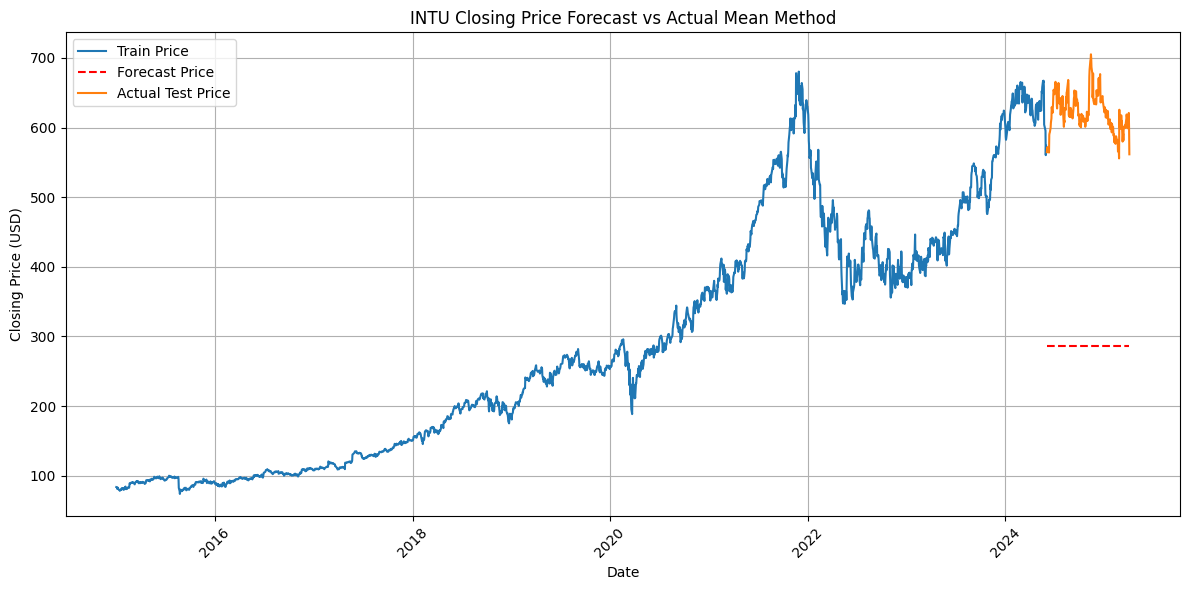

-------------Accuracy Scores-------------
RMSE: 333.32
MAE: 331.54
R-squared: -92.93


In [14]:
# Mean method:
mean = data_train.mean().iloc[0]
forecast = pd.DataFrame({
    'Close' : [mean for x in range(len(future_days))]
}, index=future_days)

plot_prediction(data_train, forecast, data_test, 'Mean Method')

# Checking accuracy scores for the first 30 days forecast
print_accuracy_scores(data_test['Close'][:30].values, forecast['Close'][:30].values)

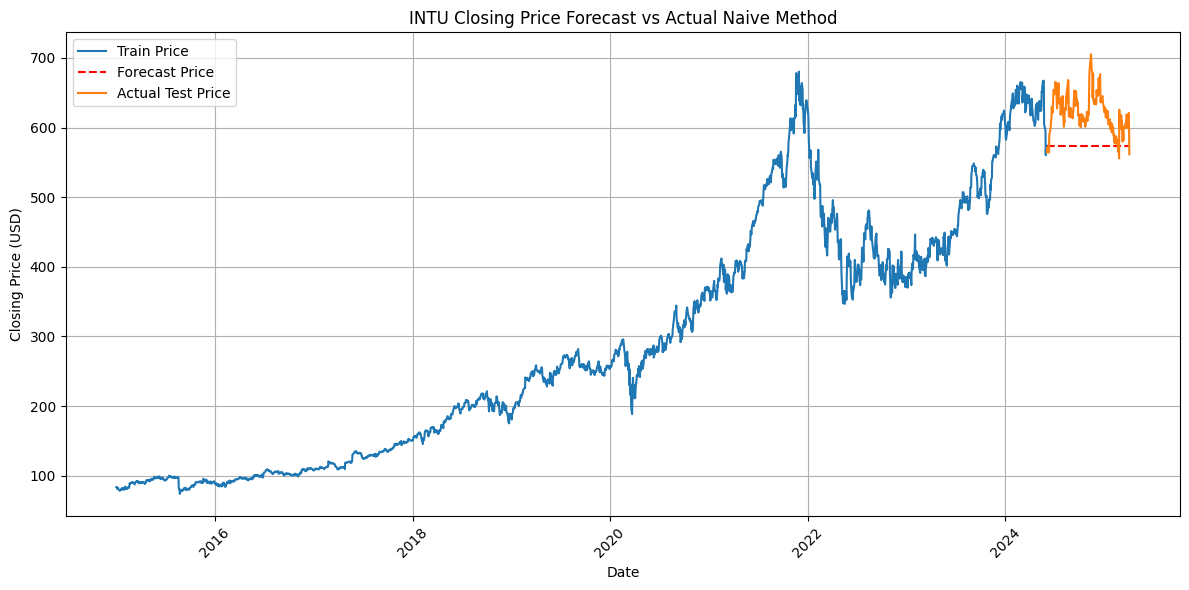

-------------Accuracy Scores-------------
RMSE: 55.76
MAE: 46.61
R-squared: -1.63


In [15]:
# Naive Method
last_price = data_train.iloc[-1]['Close']
forecast = pd.DataFrame({
    'Close' : [last_price for x in range(len(future_days))]
}, index=future_days)

plot_prediction(data_train, forecast, data_test, 'Naive Method')

# Checking accuracy scores for the first 30 days forecast
print_accuracy_scores(data_test['Close'][:30].values, forecast['Close'][:30].values)

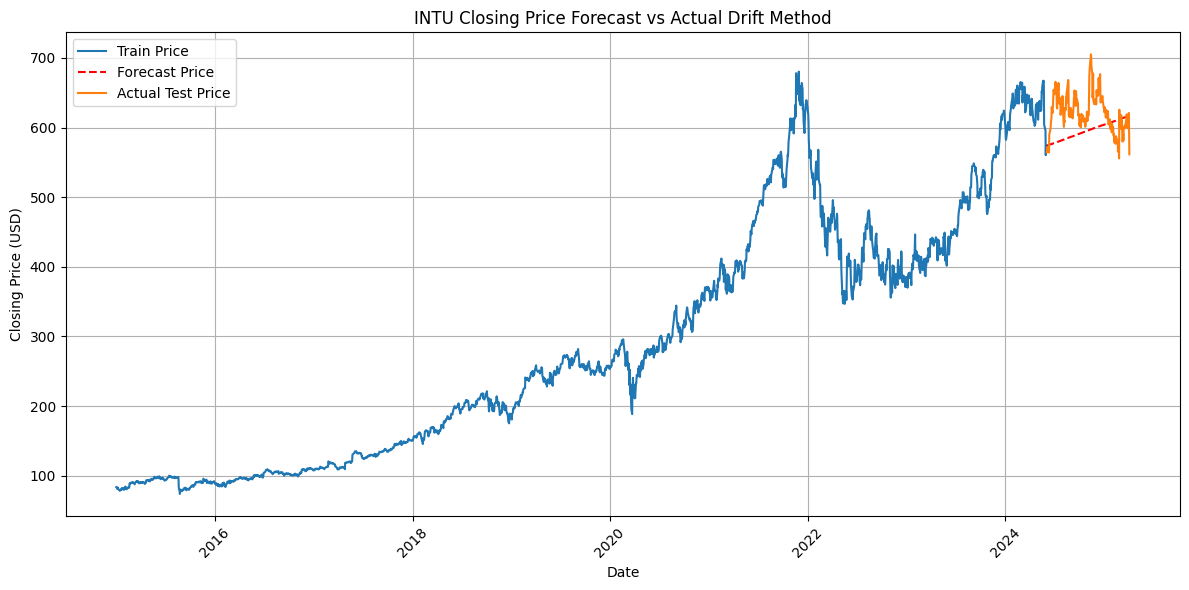

-------------Accuracy Scores-------------
RMSE: 52.40
MAE: 43.90
R-squared: -1.32


In [16]:
# Drift Method
slope = (data_train.iloc[-1]['Close'] - data_train.iloc[0]['Close']) / len(data_train)
def drift_function(x):
    return slope * x + data_train.iloc[0]['Close']

forecast = pd.DataFrame({
    'Close' : [drift_function(x + len(data_train)) for x in range(len(future_days))]
}, index=future_days)

plot_prediction(data_train, forecast, data_test, 'Drift Method')

# Checking accuracy scores for the first 30 days forecast
print_accuracy_scores(data_test['Close'][:30].values, forecast['Close'][:30].values)

We can see that our Drift model gave us the best accuracy scores so we will go with that one for our Benchmark

Now we'll look at some more advanced models

In [17]:
#Linear Regression model to predict next 30 days

days = np.arange(len(data_train)).reshape(-1, 1)  # Reshape for sklearn
prices = data_train.values.reshape(-1, 1)

In [18]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(days, prices)


LinearRegression()

In [19]:
# Predict the next days
last_day = days[-1][0]
future_days_int = np.arange(last_day + 1, last_day + 1 + len(future_days)).reshape(-1, 1)
future_prices = model.predict(future_days_int)

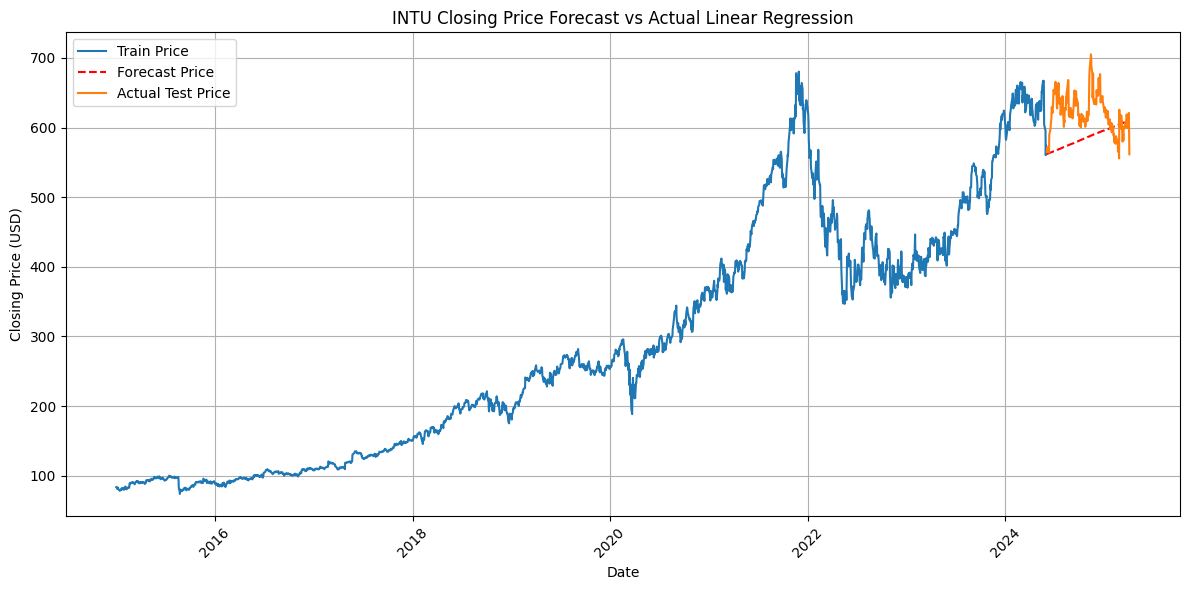

-------------Accuracy Scores-------------
RMSE: 61.81
MAE: 52.53
R-squared: -2.23


In [20]:
forecast = pd.DataFrame({
    'Close' : future_prices.reshape((len(future_days)))
}, index=future_days)


plot_prediction(data_train, forecast, data_test, 'Linear Regression')

# Checking accuracy scores for the first 30 days forecast
print_accuracy_scores(data_test['Close'][:30].values, future_prices[:30].reshape((30)))

Our Linear model perform slightly worse than our Benchmark so we will explore some other models.

Next we'll try an ARIMA model.

In [21]:
# Let's do a grid search to find our best ARIMA model:
grid_results = []
search_grid_pdq = [5, 3, 5]
count = 0
for p in range(search_grid_pdq[0]):
    for d in range(search_grid_pdq[1]):
        for q in range(search_grid_pdq[2]):
            print(f'{count + 1} of {search_grid_pdq[0]*search_grid_pdq[1]*search_grid_pdq[2]}', end='\r')
            count += 1
            try:
                model = ARIMA(data_train, order=(p,d,q))
                results = model.fit()
                grid_results.append([p, d, q, results.aic, results.bic])
            except:
                pass

In [22]:
results = pd.DataFrame(grid_results, columns=['p','d','q','aic','bic'])

display(results.sort_values('aic')[:5])
display(results.sort_values('bic')[:5])

,p,d,q,aic,bic
53,3,1,3,15954.806793,15995.195400
68,4,1,3,15956.677751,16002.836159
24,1,1,4,15957.034354,15991.653160
43,2,2,3,15957.202950,15991.819222
66,4,1,1,15957.696341,15992.315147


,p,d,q,aic,bic
5,0,1,0,15970.396157,15976.165958
6,0,1,1,15967.047898,15978.587500
20,1,1,0,15967.056174,15978.595776
11,0,2,1,15972.399792,15983.938549
12,0,2,2,15968.942083,15986.250219


We'll pick ARIMA(3,1,3) after the best AIC score.

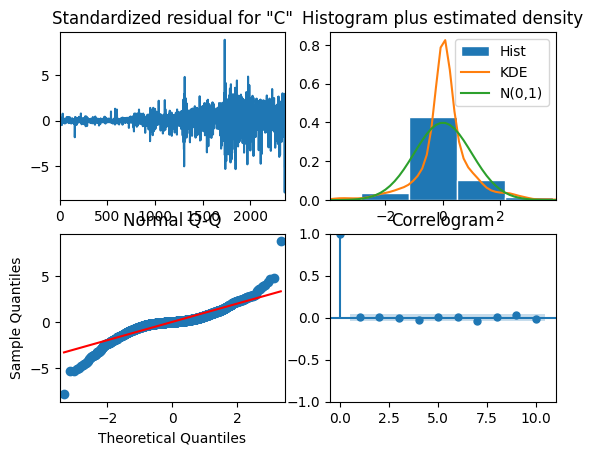

In [23]:
model = ARIMA(data_train, order=(3,1,3))
model_fit = model.fit()

fig = model_fit.plot_diagnostics()

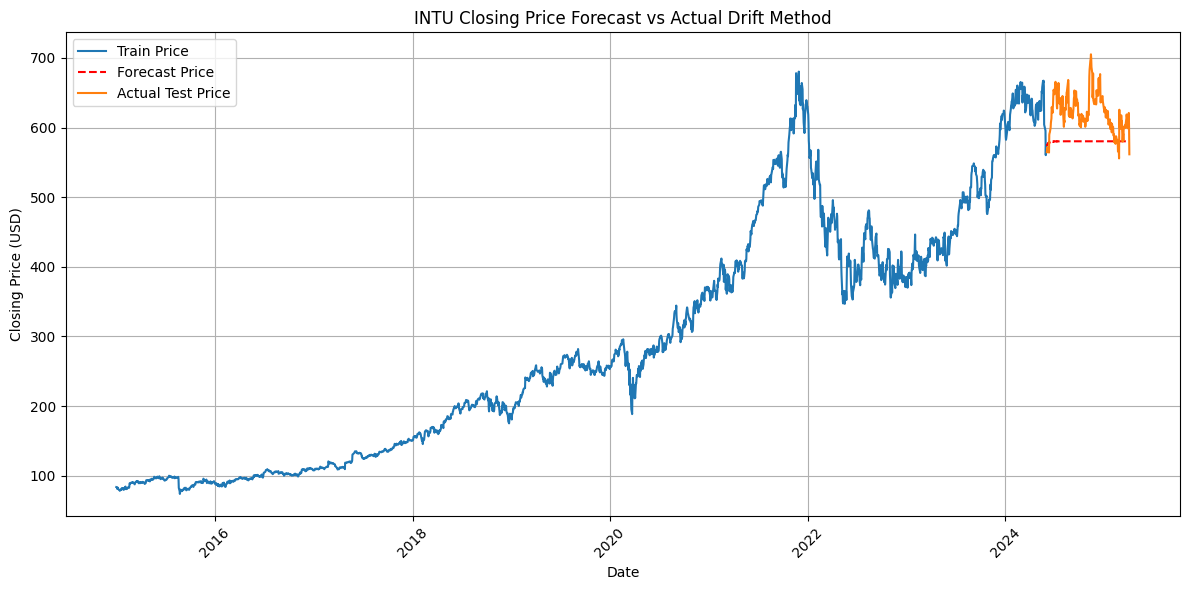

-------------Accuracy Scores-------------
RMSE: 61.81
MAE: 52.53
R-squared: -2.23


In [24]:
# Let's make predictions and calculate the accuracy scores
forecast = pd.DataFrame({
    'Close' : model_fit.forecast(steps=len(future_days)).values
}, index=future_days)


plot_prediction(data_train, forecast, data_test, 'Drift Method')

# Checking accuracy scores for the first 30 days forecast
print_accuracy_scores(data_test['Close'][:30].values, future_prices[:30].reshape((30)))

# Predictions

In [25]:
# Show the Next 30 Days prediction based on Linear Model
future_predictions_df = pd.DataFrame(future_prices, index=future_days, columns=['Predicted Close'])
print(future_predictions_df[:30])

            Predicted Close
Date                       
2024-06-03       561.712301
2024-06-04       561.944907
2024-06-05       562.177512
2024-06-06       562.410118
2024-06-07       562.642723
2024-06-10       562.875329
2024-06-11       563.107934
2024-06-12       563.340540
2024-06-13       563.573146
2024-06-14       563.805751
2024-06-17       564.038357
2024-06-18       564.270962
2024-06-20       564.503568
2024-06-21       564.736173
2024-06-24       564.968779
2024-06-25       565.201384
2024-06-26       565.433990
2024-06-27       565.666595
2024-06-28       565.899201
2024-07-01       566.131806
2024-07-02       566.364412
2024-07-03       566.597017
2024-07-05       566.829623
2024-07-08       567.062228
2024-07-09       567.294834
2024-07-10       567.527439
2024-07-11       567.760045
2024-07-12       567.992650
2024-07-15       568.225256
2024-07-16       568.457861


# MLP

In [68]:
%pip install keras

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [69]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense

In [79]:
# From the coding practice - will format the data for MLP.
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps

        if end_ix > len(sequence)-1:
            break

        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y) 

In [84]:
# Format the train and test data.
n_steps = 20
X_train, y_train = split_sequence(data_train.values, n_steps)
X_test, y_test = split_sequence(data_test.values, n_steps)

# Define the MLP model. 
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_steps))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Fit the model.
model.fit(X_train, y_train, epochs=2000, verbose=0)

# Make our predictions.
y_pred = model.predict(X_test, verbose=0)

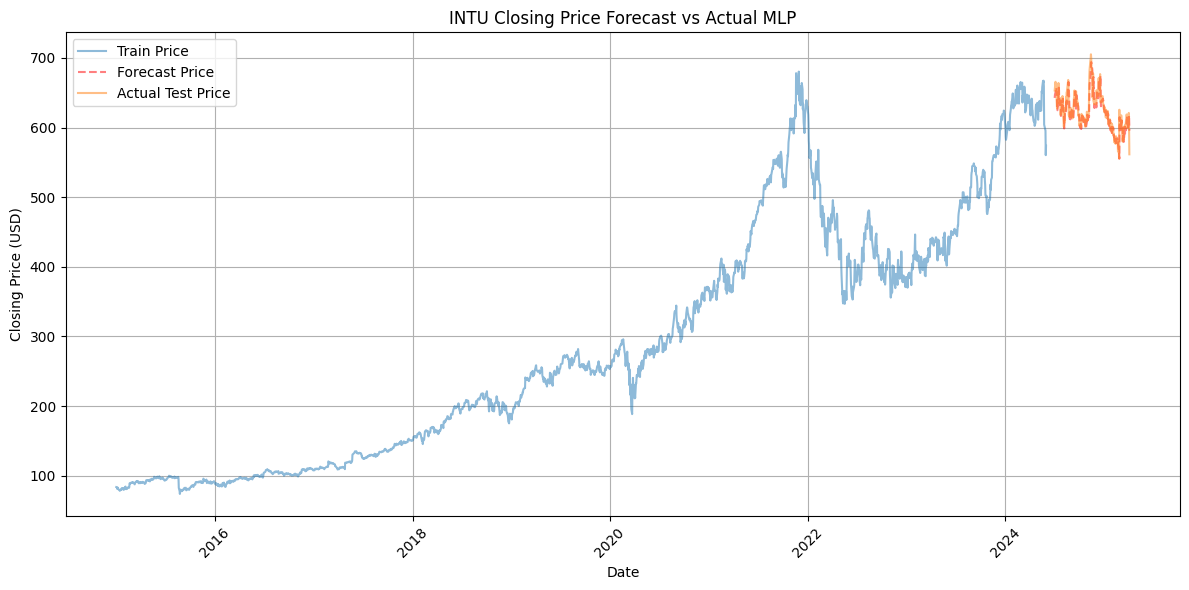

-------------Accuracy Scores-------------
RMSE: 11.40
MAE: 9.44
R-squared: 0.50


In [ ]:
# Let's make predictions and calculate the accuracy scores.
forecast = pd.DataFrame({
    'Close' : y_pred.flatten()

# The index must be the same length as the test data.
}, index=future_days[n_steps:])

# Plot the predictions.
plot_prediction(data_train, forecast, data_test[n_steps:], 'MLP')

# Checking accuracy scores for the first 30 days forecast.
print_accuracy_scores(data_test['Close'][n_steps:n_steps+30].values, y_pred.flatten()[:30])

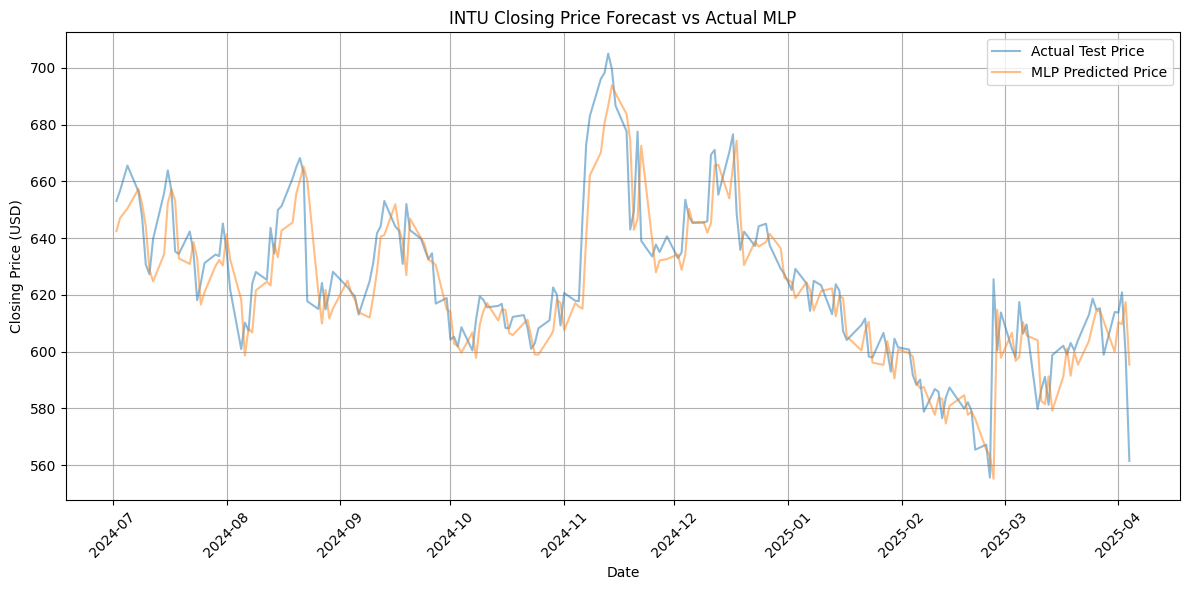

In [92]:
# Let's take a look just at the MLP predictions and actual test data.
plt.figure(figsize=(12, 6))
plt.plot(data_test.index[n_steps:], data_test['Close'][n_steps:], label='Actual Test Price', alpha=0.5)
plt.plot(data_test.index[n_steps:], y_pred.flatten(), label='MLP Predicted Price', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.title('INTU Closing Price Forecast vs Actual MLP')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We should be a little worried that the MLP seems to just be mirroring whatever the test data did the day prior. This might not give us enough time to warn stockholders about a sudden change in price (contrary to a trend). 

Despite this, MLP model performs much better than the benchmark, linear model, and ARIMA model in terms of RMSE, MAE, and R-squared. The plotted predictions look okay.